The code below trys to explore the last 2 bullet points of analyzing the history data. 

I followed the code that I found online:
https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6

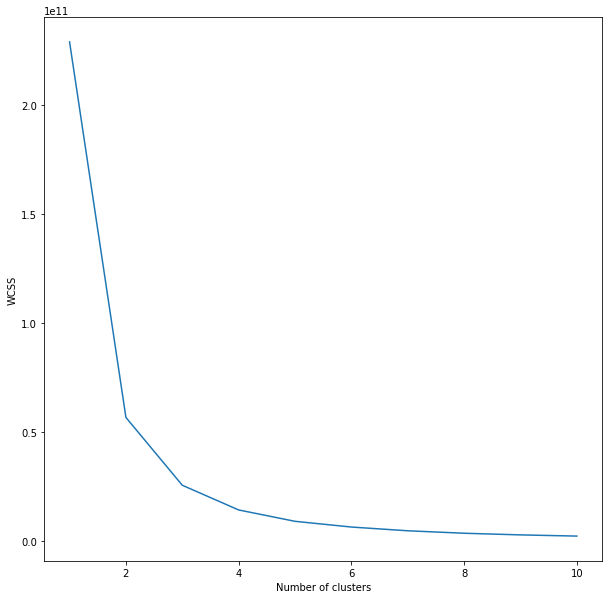

In [8]:
#lets look at k-means 
#finding appropriate number of clusters 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
%matplotlib inline 

history = pd.read_csv("user_history.csv")#.drop(['USER ID'],axis=1)
#using elbow method to find optimal number of clusters to partition history data
#kmeans = KMeans(n_clusters=2, random_state=0).fit(history)
wcss = []
for i in range(1,11):
    kmodel = KMeans(n_clusters = i, init = "k-means++")
    kmodel.fit(history)
    wcss.append(kmodel.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From graph we can see that the optimal number of clusters to partition the history data is 3. 



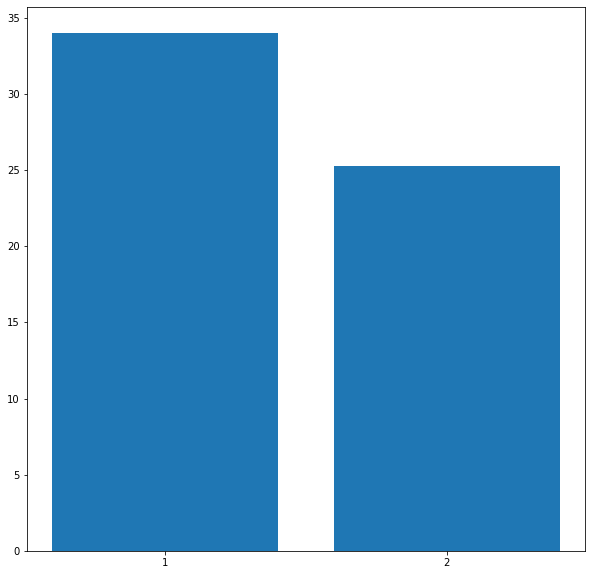

      principal component 1  principal component 2
0                 -1.779958               7.000058
1                 -5.222996              -5.078119
2                  9.113664              -1.496070
3                 -0.690604               4.096397
4                  8.217335              -1.777477
...                     ...                    ...
4495               8.941438              -1.172354
4496              -5.684048              -5.896507
4497              -2.703069               7.493439
4498               7.496030              -1.267420
4499               6.774865              -0.592419

[4500 rows x 2 columns]
[[ 8.07737264 -1.31770311]
 [-5.39031853 -5.39599479]
 [-2.68705411  6.7136979 ]]
[ 8.07737264 -5.39031853 -2.68705411]
[-1.31770311 -5.39599479  6.7136979 ]


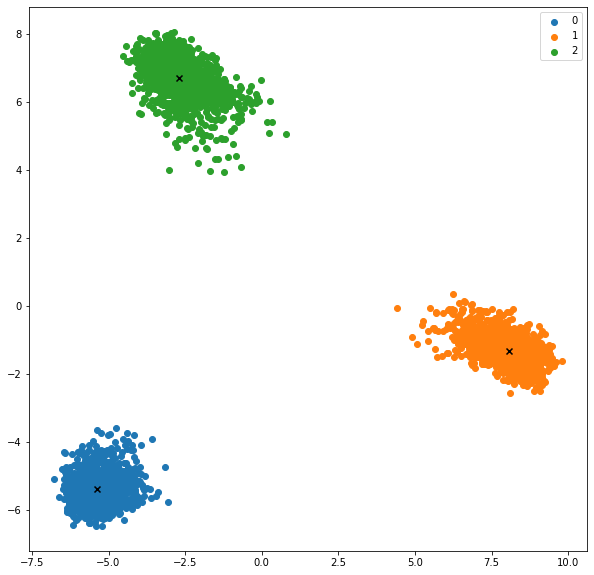

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
#change data into 2-dimensions
pca = PCA(2)
history = StandardScaler().fit_transform(history)
data = pca.fit_transform(history)

#check variance of components 
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#train k means and pca
kmeans = cluster.KMeans(3)
kmeans.fit(data)

centers = np.array(kmeans.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
print(centers)
print(centers[:,0])
print(centers[:,1])
plt.legend()
#plt.set_title('PCA', fontsize = 20)
plt.show()

In [76]:
#cov_matrix = np.cov(history)
#eigen_val = np.linalg.eig(cov_matrix)
from sklearn.linear_model import LinearRegression
#table of principle components 
his_pca = pd.DataFrame(data = data, columns = ['principal component 1', 'principal component 2'])
#print(his_pca)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#choose pc 1 as features since have higher variance ratio
features = np.zeros((4500, 1))
features[: , 0] = his_pca.iloc[:, 0]
user_ratings = pd.read_csv("user_ratings.csv")
user_ratings_table = pd.pivot_table(user_ratings,values='RATING', index='USER ID', columns='PRODUCT')
print(user_ratings_table.shape)

#np.linalg.lstsq(features,user_ratings_table)

Explained variation per principal component: [0.33984813 0.25309902]
(3000, 75)


In [ ]:
y = features 
x = user_ratings_table

#step size 
w0_n = 0
w1_n = 0
a = .04 
MSE = np.array([])

for i in range(1,5):
    y_pred = np.array([])
    error = np.array([])
    error_x = np.array([])
    
    w0 = w0_n 
    w1 = w1_n
    
    for j in x:
        y_pred = np.append(y_pred,(w0 + w1*i))
    error = np.append(error, y_pred-y)
    error_x = np.append(error_x, error*x)
    MSE_val = (error**2).mean()
    MSE = np.append(MSE,MSE_val)
    
    w0_n = w0 - a*np.sum(error)
    w1_n = w1 - a*np.sum(error_x)
    
    
    
    
    